# Vergleich der Lernergebnisse tiefer Netzwerke auf balancierten und unbalancierten Daten auf Basis von AlexNet und VGG16

### Modul Deep Learning, M.Sc. Angewandte KI, 02/2023

## Kurzfassung

Als Grundlage in dieser Ausarbeitung dient der auf der Plattform Kaggle verfügbare Datensatz "Face Mask Detection". Es handelt sich hierbei um einen unbalancierten Datensatz, das heißt, die verfügbaren Daten sind ungleich auf die vorhandenen Klassen verteilt. Mittels Oversampling durch den SMOTE-Algorithmus werden künstlich Daten generiert, um ein Gleichgewicht in den Daten herzustellen. Anschließend erfolgt das Training von Deep Learning Convolutional Neural Networks auf Basis der AlexNet- sowie VGG16-Architektur sowohl auf den unbalancierten, als auch auf den balancierten Daten. Hierbei kann gezeigt werden, dass die künstliche Datengenerierung keinen Vorteil beim Training der Netze bringt und diese sogar besser auf den unbalancierten Daten abschnitten. Zudem wird gezeigt, dass die Lernrate vor allem bei sehr tiefen Netzen entscheidend für den Lernerfolg ist.

## Inhaltsverzeichnis

1. [Einleitung](#Einleitung)<br>
2. [Vorbereitungen](#Vorbereitungen)<br>
    2.1 [Benötigte Installationen](#Installationen)<br>
    2.2 [Import der Bibliotheken](#Bibliotheken)<br>
3. [Datenimport und Analyse](#Datenimport)<br>
4. [Erstellung Trainings- und Testdatensätze](#Datensplit)<br>
5. [Definition Image Generator für unbalancierte Daten](#ImGen_Org)<br>
6. [Generierung der Oversampling-Daten](#OS-Daten)<br>
    6.1 [Aufteilen in in X- und Y-Datensatz](#Split-X-Y)<br>
    6.2 [Oversampling mittels SMOTE](#Smote)<br>
7. [Definition Image Generator für Oversampling-Daten](#ImGen_OS)<br>
8. [AlexNet](#AlexNet)<br>
    8.1 [Unbalancierte Daten](#AlexNet_Org)<br>
    8.2 [Mittels Oversampling balancierte Daten](#AlexNet_OS)<br>
9. [VGG16](#VGG16)<br>
    9.1 [Unbalancierte Daten](#VGG16_Org)<br>
    9.2 [Mittels Oversampling balancierte Daten](#VGG16_OS)<br>
10. [Vergleich](#Vergleich)<br>
11. [Fazit und Ausblick](#Fazit)<br>
12. [Literaturverzeichnis](#Literatur)<br>

<a name="Einleitung"></a>
## 1. Einleitung

Deep Learning ist eine Teildisziplin aus dem Bereich des maschinellen Lernen, die darauf basiert, tiefe Netzwerkarchitekturen zu nutzen. Großer Vorteil ist hierbei das End-to-End-Training, was bedeutet, dass die Verarbeitung von Bildern zu Features automatisch vom neuronalen Netz vorgenommen wird und nicht mehr wie beim klassichen maschinellen Lernen einzelne Input-Variablen übergeben werden. [9] Vorallem im Bereich Computer Vision konnten hier durch das Konzept von sogenannten Convolutional Neural Networks, kurz CNN, große Fortschritte erzielt werden. In den vergangenen Jahren wurden immer bessere CNN-Architekturen entwickelt, zu den bekanntesten hierbei zählen AlexNet und VGG16. 

Gleichzeitig besteht ein Problem im Bereich des maschinellen Lernens häufig dadurch, dass die Daten für das Training unbalanciert, d.h. ungleichmäßig auf die jeweiligen Kategorien verteilt sind. Dadurch besteht das Risiko, dass unterrepräsentierte Kategorien häufig nicht korrekt erkannt werden können.

In der vorliegenden Hausarbeit geht es darum zu prüfen, inwiefern tiefe CNN-Modelle auf Basis unbalancierter Daten lernen können und wie das Lernergebnis ggf. optimiert werden kann. Anschließend erfolgt das Training der Daten auf mittels Oversampling künstlich balancierten Daten zum Vergleich, ob die Balance der Daten einen Einfluss auf das Lernergebnis hat. 

Als Datengrundlage für diese Ausarbeitung dient der auf der Plattform Kaggle verfügbare Datensatz "Face Mask Detection", welcher vom dortigen Nutzer "LARXEL" vor etwa 3 Jahren veröffentlich wurde. Der Datensatz wurde bereits in einer vorherigen Hausarbeit im Modul "Maschinelles Lernen" im Sommersemester 2022 verwendet und liegt daher bereits in einer transformierten Form vor.

Im zweiten Kapitel erfolgt zunächst der Import der benötigten Bibliotheken. Da einige Bibliotheken nicht standardmäßig installiert sind, wird dies ebenfalls in diesem Kapitel durchgeführt.<br>
Das dritte Kapitel dient für den Import der benötigten Daten und stellt diese kurz vor. Zudem wird eine Analyse der Datenverteilung in den einzelnen Klassen vorgenommen.<br>
Anschließend erfolgt im vierten Kapitel die Aufteilung der Daten in Training- sowie Testdatensatz, bevor im fünften Kapitel Bildgeneratoren für das spätere Training mit den unbalancierten definiert werden.<br>
Das sechste Kapitel behandelt die Generierung der balancierten Daten mittels SMOTE-Algorithmus, wobei hier zunächst eine weitere Aufteilung der Datensätze in Input- und Zieldaten vorgenommen wird. <br>
Im darauffolgenden Kapitel werden anschließend die Bildgeneratoren für das Training mit den künstlich generierten Datensätzen erzeugt.<br>
Die Kapitel 8 und 9 behandeln jeweils das Training mittels AlexNet- bzw. VGG16-Modellen. In der ersten Stufe, dem Training auf unbalancierten Daten, wird zunächst versucht, einen Accuracy-Wert von 95% oder größer sowie einen Loss-Wert von maximal 15% zu erreichen. In der zweiten Stufe wird das Training auf den balancierten Daten durchgeführt, die mittels Oversampling generiert wurden.<br>
Das zehnte Kapitel fasst die Ergebnisse zusammen und ermöglicht zunächst einen visuellen Vergleich des Trainingsverlaufs aller Modelle. Anschließend werden die Evaulationsergebnisse in Tabellenform gegenübergestellt.<br>
Im letzten Kapitel wird abschließend ein Fazit gezogen sowie ein Ausblick aufgezeigt, wie die Arbeit fortgesetzt werden könnte.

<a name="Vorbereitungen"></a>
## 2. Vorbereitungen

<a name="Installationen"></a>
### 2.1 Benötigte Installationen

Als erster Schritt ist es zunächst notwendig, folgende Bibliotheken zu installieren:
- `CV2` bzw. `OpenCV` zur Verarbeitung von Bilddaten
- `Tensorflow` für das Deep Learning
- `Imblearn` zur Generierung von Over-Sampling-Daten

Mittels if-Schleife wird geprüft, ob eine Installation bereits vorhanden ist.

In [1]:
opencv = !pip list | grep opencv-python
if len(opencv) == 0:
    !pip install opencv-python
else:
    print("Modul 'opencv-python' ist bereits installiert.")

Modul 'opencv-python' ist bereits installiert.


In [2]:
tensorflow = !pip list | grep tensorflow
if len(tensorflow) == 0:
    !pip install tensorflow
else:
    print("Modul 'tensorflow' ist bereits installiert.")

Modul 'tensorflow' ist bereits installiert.


In [3]:
imblearn = !pip list | grep imblearn
if len(imblearn) == 0:
    !pip install imblearn
else:
    print("Modul 'imblearn' ist bereits installiert.")

Modul 'imblearn' ist bereits installiert.


<a name="Bibliotheken"></a>
### 2.2 Import der Bibliotheken

Nachdem nun die benötigten Installationen durchgeführt wurden müssen als nächsten die Bibliotheken importiert werden, die für die Hausarbeit relevant sind. Neben den bereits oben genannten sind dies `Pandas`, `NumPy`, `OS`, `Matplotlib.PyPlot` sowie `Train-Test-Split` aus dem Modul `Scikit-Learn`.

In [4]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras import Model

2023-02-13 16:22:41.039429: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 16:22:41.755137: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:/opt/conda/lib/:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-13 16:22:41.755252: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/l

<a name="Datenimport"></a>
## 3. Datenimport und Analyse

Folgend werden nun die Daten importiert, die zur Bearbeitung erforderlich sind. Die Kaggle-Daten liegen in Form von XML-Dateien vor und müssen daher für eine sinnvolle Verarbeitung zunächst umformatiert werden. Da dies bereits in der vorherigen Hausarbeit geschehen ist, werden die dort bereits aufbereiteten Daten als DataFrame importiert, um diesen Schritt nicht erneut durchzuführen.

In [5]:
df = pd.read_csv("source/data/dfData.csv")

Insgesamt sind 4072 Datensätze vorhanden - das bedeutet, dass dementsprechend auch 4072 zugehörige Bilddateien im .png-Format vorhanden sind.<br>


Das DataFrame enthält neben Angaben zum Filename der Bilddateien auch Informationen zur Größe und Breite des Bildes. Weiterhin sind Informationen zu den Labeln vorhanden, die für die Klassifizierung herangezogen werden:
- `with_mask`: beschreibt Objekte, die eine Maske korrekt tragen
- `mask_weared_incorrect`: beschreibt Objekte, die zwar eine Maske tragen, jedoch nicht korrekt
- `without_mask` : beschreibt Objekte, die keine Maske tragen

In [6]:
df

,file,width,height,label,xmin,ymin,xmax,ymax,file_image,file_annotation,image_bb
0,maksssksksss0,512,366,without_mask,79,105,109,142,maksssksksss0.png,maksssksksss0.xml,maksssksksss0_0.png
1,maksssksksss0,512,366,with_mask,185,100,226,144,maksssksksss0.png,maksssksksss0.xml,maksssksksss0_1.png
2,maksssksksss0,512,366,without_mask,325,90,360,141,maksssksksss0.png,maksssksksss0.xml,maksssksksss0_2.png
3,maksssksksss1,400,156,with_mask,321,34,354,69,maksssksksss1.png,maksssksksss1.xml,maksssksksss1_3.png
4,maksssksksss1,400,156,with_mask,224,38,261,73,maksssksksss1.png,maksssksksss1.xml,maksssksksss1_4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,maksssksksss98,400,267,with_mask,263,62,287,85,maksssksksss98.png,maksssksksss98.xml,maksssksksss98_4067.png
4068,maksssksksss98,400,267,with_mask,344,80,377,106,maksssksksss98.png,maksssksksss98.xml,maksssksksss98_4068.png
4069,maksssksksss99,400,267,mask_weared_incorrect,181,54,273,162,maksssksksss99.png,maksssksksss99.xml,maksssksksss99_4069.png
4070,maksssksksss99,400,267,with_mask,99,87,176,165,maksssksksss99.png,maksssksksss99.xml,maksssksksss99_4070.png


Wie sich zeigt, sind die Daten sehr unbalanciert, d.h. ungleich auf die vorhandenen Klassen verteilt. Vor allem die Klasse `with_mask` ist sehr präsent, wohingegen das Label `mask_weared_incorrect` kaum vorhanden ist und somit im Vergleich nur wenig Daten für das Training in dieser Klasse zur Verfügung stehen.

In [7]:
sum_labels = {'with_mask': 0 , 'without_mask': 0, 'mask_weared_incorrect': 0}
for i in df.index:
    if df['label'].iloc[i] == 'with_mask':
        sum_labels['with_mask'] += 1
    if df['label'].iloc[i] == 'without_mask':
        sum_labels['without_mask'] += 1
    if df['label'].iloc[i] == 'mask_weared_incorrect':
        sum_labels['mask_weared_incorrect'] += 1

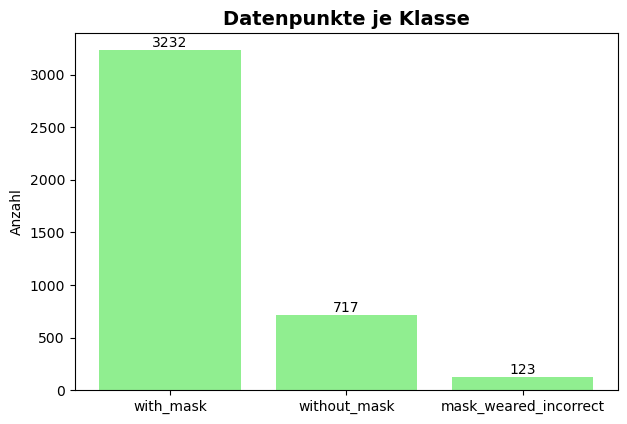

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.tight_layout(pad=0.5, w_pad=2.0, h_pad=3.0)
bar_labels = ax.bar(*zip(*sum_labels.items()), color = 'lightgreen')
ax.set_ylabel("Anzahl")
ax.set_title("Datenpunkte je Klasse", fontsize = 14, fontweight = 'bold')
ax.bar_label(bar_labels)
plt.show()

Nachdem nun das DataFrame importiert wurde, wird noch der benötigte Pfad zu den Bilddateien als Variable angelegt.

In [9]:
img_path ='source/img2/'
img_files = os.listdir(img_path)

Es ist erkennbar, dass die Anzahl der Bilddateien mit der Anzahl der Datensätze im DataFrame übereinstimmt (=4072).

In [10]:
len(img_files)

4072

In [11]:
img = img_path+img_files[2]
img

'source/img2/maksssksksss372_1450.png'

Zur Überprüfung der Bilddateien wird nun eine .png-Datei eingelesen und anschließend dargestellt. <br>
Zu beachten ist, dass das Modul CV2 grundsätzlich mit BGR-Farbkanälen arbeitet, was eine Umkonvertierung in das RGB-Format erforderlich macht.<br>
Das Objekt `im` beeinhaltet zu jedem einzelnen Pixel die jeweiligen RGB-Werte als Arrays.<br>
Durch die Ausgabe der Shape des Bildes lässt sich feststellen, dass dieses im Format 24x21 Pixeln vorhanden und somit recht klein ist.

In [12]:
im = cv2.imread(img_path+img_files[2])
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im.shape

(24, 21, 3)

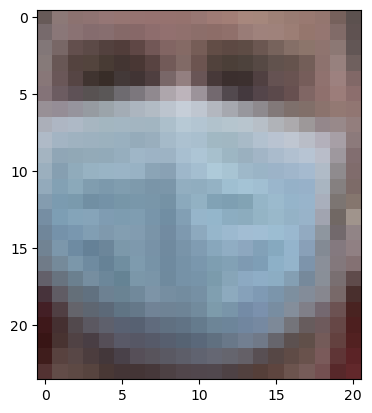

In [13]:
plt.imshow(im)

Da in der späteren Arbeit als Input für die CNN-Netze größere Bilddateien im Format 224x224 erforderlich sind wird im Folgenden beispielhaft das vorherige Bild auf die Größe 224x224 hochskaliert. Es ist erkennbar, dass es dadurch nicht zu einer Verschlechterung der Qualität des Bildes kommt.

In [14]:
im2 = cv2.resize(im, (244,244), interpolation = cv2.INTER_AREA)
im2.shape

(244, 244, 3)

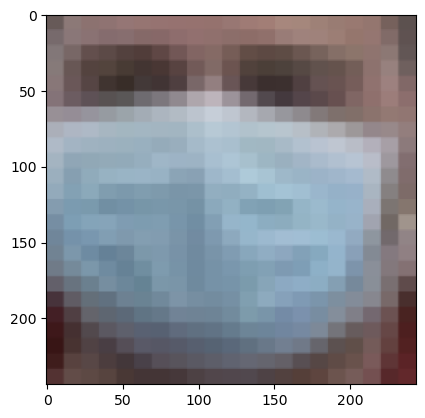

In [15]:
plt.imshow(im2)

<a name="Datensplit"></a>
## 4. Erstellung Trainings- und Testdatensätze

Bisher liegen alle vorhandenen Daten in einem DataFrame vor. Für ein effizientes Training und anschließende Evaluierung ist es allerdings erforderlich, die Daten in unterschiedliche Datensätze aufzuteilen: in ein Test- sowie ein Trainings-Datenset.<br>
Scikit-Learn bietet ein Modul, welches ein einfaches Splitten der Daten ermöglicht. Es werden 20% der Daten für das Trainings-Set festgelegt, was einem weitläufigen Standard im Bereich des maschinellen Lernens entspricht.<br>
Nach dem Splitten ist es ratsam zu prüfen, ob beide Datensätze korrekt erstellt wurden. Dazu bietet sich die Ausgabe der Shape an. 

In [16]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state = 42)

In [17]:
train_set.shape

(3257, 11)

In [18]:
test_set.shape

(815, 11)

<a name="ImGen_Org"></a>
## 5. Definition Image Generator für unbalancierte Daten

Nachdem nun der Split in Test- und Trainingsdatenset vorgenommen wurde werden anschließend Generatoren für die Bilddateien erstellt. Diese dienen dazu, die zur Verfügung stehende Datenmenge zu erweitern, indem die Inputbilder entsprechend der gewünschten Vorgaben oder nach Zufallsprinzip transfomiert werden. Dadurch stehen während des Trainings mehr Merkmale zur Verfügung und das Netz erhält die Möglichkeit, eine bessere Generalisierung zu erlernen.<br>
Für diesen Prozess wird der `ImageDataGenerator` aus Keras importiert. Anschließend wird definiert, dass 25% der Daten als Validierungsdatensatz verwendet und die RGB-Werte durch die Division durch 255 normalisiert werden.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
datagen = ImageDataGenerator(rescale = 1./255., validation_split=0.25)

Im nächsten Schritt können die Generatoren für die Trainings- sowie die Validierungsdaten erzeugt werden. Der Import der Daten erfolgt direkt über das DataFrame und aus dem Speicherort der Bilddateien. Da im weiteren Verlauf eine Input-Shape von 224x224 für die CNN-Netze notwendig sind, wird zudem eine entsprechende Zielgröße vorgegeben.

In [21]:
train_gen= datagen.flow_from_dataframe(
    dataframe=train_set, 
    directory='./source/img2',
    x_col='image_bb',
    y_col='label',
    subset='training',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode= 'categorical',
    target_size = (224,224)
)

Found 2443 validated image filenames belonging to 3 classes.


In [22]:
valid_gen= datagen.flow_from_dataframe(
    dataframe=train_set,
    directory= './source/img2',
    x_col='image_bb',
    y_col='label',
    subset='validation',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_model= 'categorical',
    target_size= (224,224)
)

Found 814 validated image filenames belonging to 3 classes.


Die vorherigen Schritte werden nun mit den Testdaten wiederholt mit der Unterschied, dass hier natürlich kein Validierungsdatensatz notwendig ist.

In [23]:
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [24]:
test_gen= test_datagen.flow_from_dataframe(
    dataframe=test_set,
    directory= './source/img2',
    x_col='image_bb',
    y_col='label',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_model= 'categorical',
    target_size= (224,224)  
)

Found 815 validated image filenames belonging to 3 classes.


<a name="OS-Daten"></a>
## 6. Generierung der Oversampling-Daten

Da die Daten in unbalancierter Form vorliegen und untersucht werden soll, inwiefern dies einen Einfluss auf die Lernqualität eines CNN-Netzes hat, wird nun eine Balance in den Daten künstlich generiert. Mögliche Techniken dazu sind bspw. das Undersampling oder auch das Oversampling. Während beim Undersampling alle Datensätze auf die Menge reduziert werden, die die unterrepräsentierste Klasse enthält, werden beim Oversampling im Gegensatz dazu die Daten der unterrepräsentierten Klassen auf die Menge, die die stärkste Klasse besitzt, hochskaliert. Dadurch stehen im Endeffekt insgesamt mehr Daten für das Training zur Verfügung bei einer ausgeglichenen Anzahl an Datensätzen je Klasse.

<a name="Split-X-Y"></a>
### 6.1 Aufteilen in in X- und Y-Datensatz

Bevor das Oversampling durchgeführt wird ist zunächst der Trainingsdatensatz in X- und Y-Datensätze zu trennen. Dies geschieht, da beim Oversampling Input und Output als Array übergeben werden müssen.<br>
Hierzu werden zunächst die Daten in zwei Listen gesplittet und in das für AlexNet und VGG16 als Input relevante Format 224x224 transformiert.

In [25]:
x_train = []
y_train = []
for i in train_set.index:
    file = train_set['image_bb'][i]
    path = 'source/img2/'+file
    im = cv2.imread(path)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (224, 224))
    x_train.append(im)
    label = train_set['label'][i]
    y_train.append(label)

Anschließend erfolgt die Umwandlung in ein NumPy-Array.

In [26]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

Da die Labels als String vorliegen muss zudem eine Umwandlung in Zahlenformat sowie anschließend eine Codierung in die einzelnen Kategorien mittels One-Hot-Encoding vorgenommen werden.

In [27]:
y_train = np.unique(y_train, return_inverse = True)

In [28]:
y_train = to_categorical(y_train[1],3)

<a name="Smote"></a>
### 6.2 Oversampling mittels SMOTE

Für das Oversampling wird auf die Bibliothek `Imblearn` zugegriffen und dort auf den `SMOTE`-Algorithmus.

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
sm = SMOTE(random_state=42)

Als Input ist hierbei ein 2D-Array erforderlich. Da die Inputdaten als RGB-Werte vorliegen und somit mehr Dimensionen aufweisen, wird zunächst eine Transformation vorgenommen.

In [31]:
i, x, y, rgb = x_train.shape

In [32]:
x_train2d = x_train.reshape(i, x*y*rgb)
x_train2d.shape

(3257, 150528)

Nun kann das Oversampling mittels `SMOTE` durchgeführt werden. In der ausgegebenen Shape ist erkennbar, das nun insgesamt 7788 Datensätze vorhanden sind.

In [33]:
x_train_sm, y_train_sm = sm.fit_resample(x_train2d, y_train)
x_train_sm.shape, y_train_sm.shape

((7788, 150528), (7788, 3))

Anschließend werden die Inputdaten mittels `Reshape` wieder in ihre urspüngliche Form transformiert.

In [34]:
x_train_sm = x_train_sm.reshape(-1,224,224,3)
x_train_sm.shape, y_train_sm.shape

((7788, 224, 224, 3), (7788, 3))

<a name="ImGen_OS"></a>
## 7. Definition Image Generator für Oversampling-Daten

Nach der Durchführung des Oversampling können nun die Bildgeneratoren für das spätere Training definiert werden. Dazu werden für die Trainingsdaten die SMOTE-Datensätze verwendet. Für die Validierung hingegen werden die unbalancierten Datensätze vor dem Oversampling genutzt. Dies hat den Hintergrund, das dadurch bereits während der Validierung dem Modell ermöglicht wird, seine erlernten Gewichte auf unbalancierte Daten anzupassen und zu verfeinern, denn auch in der Realität liegt in der Regel nicht immer eine balancierte Datenlage vor. Aus diesem Grund wird auch kein weiterer Generator für die Testdaten erstellt, da hierbei der zuvor erstellte Generator der unbalancierten Originaldaten verwendet werden kann. <br>
Im Gegensatz zu den Generatoren für die Originaldaten wird hier direkt aus den Arrays geladen und nicht über das Dataframe.

In [35]:
train_gen_os = datagen.flow(
    x = x_train_sm,
    y = y_train_sm,
    batch_size= 32,
    shuffle = True,
    seed = 42,
    subset = 'training'
)

In [36]:
valid_gen_os = datagen.flow(
    x = x_train,
    y = y_train,
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'validation'
)

<a name="AlexNet"></a>
## 8. AlexNet

In diesem Kapitel erfolgt nun das Training der CNN-Modelle auf Basis der AlexNet-Architektur. Zunächst wird das Training auf die unbalancierten Originaldaten durchgeführt, bevor anschließend die Oversampling-Datensätze verwendet werden.<br>
Ziel beim Training auf den unbalancierten Daten ist es ein Model zu konstruieren, dass mind. 95% Accuracy sowie max. 15% Loss bei der Evaluation erreicht. Je nach Ergebnis können dazu mehrere Durchläufe mit der Anpassung von Parametern notwendig sein.

<a name="AlexNet_Org"></a>
### 8.1 Unbalancierte Daten

Für das Training auf die unbalancierten Daten wird zunächst das Modell gemäß AlexNet-Architektur definiert. Da insgesamt drei Kategorien vorhanden sind, wird der letzte Layer, die Output-Schicht, auf eine Ausgabe von drei Neuronen gesetzt.<br>
Da dies das erste Modell ist, was Training wird, erhält es die Bezeichnung `alex1`.

In [37]:
alex1 = Sequential([
    Conv2D(96, (11, 11), strides = (4, 4), activation = 'relu', input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
    Conv2D(256, (5, 5), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = (3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(384, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
    Flatten(),
    Dense(4096, activation = 'relu'),
    Dense(4096, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

2023-02-13 16:24:14.737592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 16:24:15.204112: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78977 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:01:00.0, compute capability: 8.0


Insgesamt besteht das Modell aus 12 Layern und kann daher als tiefes Netz bezeichnet werden.

In [38]:
len(alex1.layers)

12

Anschließend erfolgt die Kompilierung des Modells. Die Lernrate wird zum Start auf den Standardwert von 0,001 für den Adam-Optimierer gesetzt.

In [39]:
alex1.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy',keras.metrics.Recall()])

Ergänzend wird ein Early-Stopping definiert, damit das Netz das Training abbricht, wenn es stagniert. Das Early-Stopping ist hierbei so eingestellt, dass der Loss-Wert des Validierungsdatensatzes beobachtet wird und das Training abgebrochen wird, wenn der Wert fünf Epochen lang nicht mehr sinkt.

In [40]:
alex_cb = [keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)]

Nun erfolgt das Training des ersten Modells. Als Eingangsdaten für das Training dient der Trainingsgenerator, zusätzlich wird der Validierungsgenerator zur Netzvalidierung übergeben und die Epochenanzahl auf 20 gesetzt.

In [41]:
alex1_hist = alex1.fit(train_gen, validation_data = valid_gen, epochs = 20, callbacks = alex_cb)

Epoch 1/20


2023-02-13 16:24:28.195971: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2023-02-13 16:24:28.765773: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-13 16:24:28.796813: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fad58028100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-13 16:24:28.796883: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-02-13 16:24:28.805571: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-13 16:24:28.936269: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of th

77/77 [==============================] - 10s 78ms/step - loss: 0.6505 - accuracy: 0.7773 - recall: 0.7278 - val_loss: 0.2958 - val_accuracy: 0.9017 - val_recall: 0.8931
Epoch 2/20
77/77 [==============================] - 6s 73ms/step - loss: 0.3165 - accuracy: 0.8903 - recall: 0.8682 - val_loss: 0.2228 - val_accuracy: 0.9337 - val_recall: 0.9238
Epoch 3/20
77/77 [==============================] - 6s 73ms/step - loss: 0.2767 - accuracy: 0.9009 - recall: 0.8870 - val_loss: 0.2425 - val_accuracy: 0.9238 - val_recall: 0.9189
Epoch 4/20
77/77 [==============================] - 6s 73ms/step - loss: 0.2157 - accuracy: 0.9243 - recall: 0.9181 - val_loss: 0.2555 - val_accuracy: 0.9017 - val_recall: 0.8931
Epoch 5/20
77/77 [==============================] - 6s 71ms/step - loss: 0.2146 - accuracy: 0.9259 - recall: 0.9181 - val_loss: 0.2862 - val_accuracy: 0.9017 - val_recall: 0.8993
Epoch 6/20
77/77 [==============================] - 6s 71ms/step - loss: 0.1963 - accuracy: 0.9329 - recall: 0.9284

Das Training wird durch Early-Stopping nach 11 Epochen gestoppt, da der Val-Loss-Wert in den letzten 5 Epochen nicht mehr gesunken ist.<br>
Das Resultat des Trainings wird anschließend in ein Dataframe geschrieben.

In [42]:
alex1_res = pd.DataFrame(alex1_hist.history)

Evaluiert man das trainierte Modell mit den Testdaten, ergibt sich ein Loss-Wert von 17,9% sowie eine Accuracy von 94,4%. Die gesetzten Zielwerte werden also knapp verfehlt, weshalb ein weiteres Modell auf den Daten trainiert wird.

In [43]:
alex1_ev = alex1.evaluate(train_gen)
alex1_ev

77/77 [==============================] - 5s 59ms/step - loss: 0.1788 - accuracy: 0.9443 - recall: 0.9431


[0.178788423538208, 0.9443307518959045, 0.9431027173995972]

Wie beim ersten Modell wird nun das Netz `alex2` definiert.

In [44]:
alex2 = Sequential([
    Conv2D(96, (11, 11), strides = (4, 4), activation = 'relu', input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
    Conv2D(256, (5, 5), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = (3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(384, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
    Flatten(),
    Dense(4096, activation = 'relu'),
    Dense(4096, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

Da die Messwerte nah an den Zielwerten lagen, wird nun die Lernrate geringfügig gesenkt: von 0,001 auf 0,0008.

In [46]:
alex2.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate = 0.0008),
              metrics = ['accuracy',keras.metrics.Recall()])

Nach dem Komplilieren mit neuer Lernrate wird erneut das Training gestartet.

In [47]:
alex2_hist = alex2.fit(train_gen, validation_data = valid_gen, epochs = 20, callbacks = alex_cb)

Epoch 1/20
77/77 [==============================] - 8s 75ms/step - loss: 0.7921 - accuracy: 0.7974 - recall_2: 0.7208 - val_loss: 0.4553 - val_accuracy: 0.7961 - val_recall_2: 0.7961
Epoch 2/20
77/77 [==============================] - 6s 74ms/step - loss: 0.3354 - accuracy: 0.8743 - recall_2: 0.8588 - val_loss: 0.3453 - val_accuracy: 0.8845 - val_recall_2: 0.8759
Epoch 3/20
77/77 [==============================] - 6s 72ms/step - loss: 0.2428 - accuracy: 0.9177 - recall_2: 0.9104 - val_loss: 0.2828 - val_accuracy: 0.9029 - val_recall_2: 0.8956
Epoch 4/20
77/77 [==============================] - 6s 73ms/step - loss: 0.2251 - accuracy: 0.9210 - recall_2: 0.9140 - val_loss: 0.3367 - val_accuracy: 0.8636 - val_recall_2: 0.8563
Epoch 5/20
77/77 [==============================] - 6s 75ms/step - loss: 0.2439 - accuracy: 0.9116 - recall_2: 0.9054 - val_loss: 0.2460 - val_accuracy: 0.9312 - val_recall_2: 0.9189
Epoch 6/20
77/77 [==============================] - 5s 70ms/step - loss: 0.2860 - acc

In [48]:
alex2_res = pd.DataFrame(alex2_hist.history)

Die Reduzierung der Lernrate hat dazu geführt, dass der Loss-Wert von 17,9% auf 11,2% gesunken ist. Zudem konnte der Accuracy-Wert von 94,4% auf 95,9% erhöht werden. Die gesetzten Grenzwerte werden nun also erreicht.

In [49]:
alex2_ev = alex2.evaluate(train_gen)
alex2_ev

77/77 [==============================] - 4s 55ms/step - loss: 0.1123 - accuracy: 0.9595 - recall_2: 0.9595


[0.11232909560203552, 0.9594760537147522, 0.9594760537147522]

<a name="AlexNet_OS"></a>
### 8.2 Mittels Oversampling balancierte Daten

Nachdem das Training auf den unbalancierten Daten mittels AlexNet-Architektur durchgeführt wurde, wird ein weiteres Netz `alex3` für das Training auf die oversampled Daten definiert.

In [86]:
alex3 = Sequential([
    Conv2D(96, (11, 11), strides = (4, 4), activation = 'relu', input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
    Conv2D(256, (5, 5), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = (3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(384, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
    Flatten(),
    Dense(4096, activation = 'relu'),
    Dense(4096, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

Wie beim ersten Modell auf die unbalancierten Daten wird zur besseren Vergleichbarkeit auch hier mit der Standard-Lernrate von 0,001 gestartet.

In [87]:
alex3.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy',keras.metrics.Recall()])

Als Trainingsdaten dienen nun die Daten, die mittels des Oversampling-Generators erzeugt wurden. Für die Validierung werden die unbalancierten Daten verwendet, damit das Netz die Hyperparameter verfeinern kann, da auch in der Realität nicht von einer balancierten Datenlage ausgegangen werden kann.

In [88]:
alex3_hist = alex3.fit(train_gen_os, validation_data = valid_gen_os, epochs = 20, callbacks = alex_cb)

Epoch 1/20
183/183 [==============================] - 4s 13ms/step - loss: 1.2060 - accuracy: 0.4345 - recall_11: 0.1108 - val_loss: 1.4607 - val_accuracy: 0.0356 - val_recall_11: 0.0000e+00
Epoch 2/20
183/183 [==============================] - 2s 13ms/step - loss: 0.9601 - accuracy: 0.4612 - recall_11: 0.1808 - val_loss: 1.2045 - val_accuracy: 0.1683 - val_recall_11: 0.0000e+00
Epoch 3/20
183/183 [==============================] - 3s 14ms/step - loss: 0.8599 - accuracy: 0.5211 - recall_11: 0.3119 - val_loss: 1.1593 - val_accuracy: 0.5197 - val_recall_11: 0.0160
Epoch 4/20
183/183 [==============================] - 3s 13ms/step - loss: 0.6974 - accuracy: 0.6775 - recall_11: 0.5783 - val_loss: 0.5612 - val_accuracy: 0.8059 - val_recall_11: 0.8010
Epoch 5/20
183/183 [==============================] - 3s 15ms/step - loss: 0.4681 - accuracy: 0.8118 - recall_11: 0.7987 - val_loss: 0.2783 - val_accuracy: 0.9079 - val_recall_11: 0.9017
Epoch 6/20
183/183 [==============================] - 3s 

In [89]:
alex3_res = pd.DataFrame(alex3_hist.history)

Das Training wird nach 15 Epochen mittels Early-Stopping abgebrochen. Die Evaluation auf die unbalancierten Testdaten ergibt einen Loss-Wert von 15,5% sowie eine Accuracy von 95,5%. Im Vergleich zum Training mit den unbalancierten Daten sind hier also leicht bessere Ergebnisse erzielt worden.

In [90]:
alex3_ev = alex3.evaluate(train_gen)
alex3_ev

77/77 [==============================] - 4s 49ms/step - loss: 0.1550 - accuracy: 0.9554 - recall_11: 0.9550


[0.15501590073108673, 0.9553827047348022, 0.9549733996391296]

Um zu prüfen, wie eine Reduzierung der Lernrate sich im Falle der balancierten Daten verhält, wird das Netz `alex4` definiert.

In [100]:
alex4 = Sequential([
    Conv2D(96, (11, 11), strides = (4, 4), activation = 'relu', input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
    Conv2D(256, (5, 5), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = (3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(384, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
    Flatten(),
    Dense(4096, activation = 'relu'),
    Dense(4096, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

Die Lernrate wird hierbei wie bei `alex2` auf 0,0008 reduziert.

In [101]:
alex4.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate = 0.0008),
              metrics = ['accuracy',keras.metrics.Recall()])

In [102]:
alex4_hist = alex4.fit(train_gen_os, validation_data = valid_gen_os, epochs = 20, callbacks = alex_cb)

Epoch 1/20
183/183 [==============================] - 5s 14ms/step - loss: 0.8304 - accuracy: 0.5978 - recall_14: 0.4266 - val_loss: 0.8135 - val_accuracy: 0.6437 - val_recall_14: 0.5823
Epoch 2/20
183/183 [==============================] - 2s 13ms/step - loss: 0.4921 - accuracy: 0.8035 - recall_14: 0.7898 - val_loss: 0.4486 - val_accuracy: 0.8194 - val_recall_14: 0.8157
Epoch 3/20
183/183 [==============================] - 3s 15ms/step - loss: 0.4431 - accuracy: 0.8225 - recall_14: 0.8108 - val_loss: 0.4913 - val_accuracy: 0.7912 - val_recall_14: 0.7740
Epoch 4/20
183/183 [==============================] - 2s 13ms/step - loss: 0.3936 - accuracy: 0.8497 - recall_14: 0.8413 - val_loss: 0.3831 - val_accuracy: 0.8563 - val_recall_14: 0.8501
Epoch 5/20
183/183 [==============================] - 3s 14ms/step - loss: 0.3404 - accuracy: 0.8695 - recall_14: 0.8629 - val_loss: 0.2965 - val_accuracy: 0.9066 - val_recall_14: 0.9042
Epoch 6/20
183/183 [==============================] - 2s 13ms/ste

In [103]:
alex4_res = pd.DataFrame(alex4_hist.history)

Das Netz konnte seine Werte nochmals verbessern und erreicht jetzt einen Loss-Wert von 12,9% sowie eine Accuracy von 96,2%. Jedoch ist nun beim vergleichbaren Modell `alex2` auf die unbalancierten Daten ein nur geringfügig schlechterer Accuracy-Wert erzielt worden, wohingegen der Loss-Wert mit 11,2% deutlich besser ist.

In [104]:
alex4_ev = alex4.evaluate(train_gen)
alex4_ev

77/77 [==============================] - 4s 54ms/step - loss: 0.1286 - accuracy: 0.9623 - recall_14: 0.9611


[0.12862107157707214, 0.9623413681983948, 0.9611133933067322]

<a name="VGG16"></a>
## 9. VGG16

In diesem Kapitel erfolgt nun das Training der CNN-Modelle auf Basis der VGG16-Architektur. Wie beim AlexNet wird das Training auf die unbalancierten Originaldaten durchgeführt, bevor anschließend die Oversampling-Datensätze verwendet werden.<br>

<a name="VGG16_Org"></a>
### 9.1 Unbalancierte Daten

Zunächst wird das erste VGG16-Netz `vgg1` definiert.

In [161]:
vgg1 = Sequential([
    Conv2D (filters =64, kernel_size =(3,3), padding ='same', activation='relu', input_shape = (224,224,3)),
    Conv2D (filters =64, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =128, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =128, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Flatten(),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 3, activation ='softmax')
])

Die Ausgabe der Layeranzahl ergibt, dass das VGG16-Modell 22 Layer besitzt, dies sind 10 mehr als die AlexNet-Modelle. Das VGG16-Netz ist also im Vergleich deutlich tiefer.

In [162]:
len(vgg1.layers)

22

Zur besseren Vergleichbarkeit wird auch hier mit der Standard-Lernrate von 0,001 gestartet.

In [163]:
vgg1.compile(loss= 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy',keras.metrics.Recall()])

Wie beim AlexNet wird auch beim VGG16 ein Early-Stopping mit den gleichen Parametern angewendet.

In [164]:
vgg_cb = [keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)]

Anschließend erfolgt das erste Training mittels VGG16-Architektur auf die unbalancierten Daten.

In [165]:
vgg1_hist = vgg1.fit(train_gen, validation_data = valid_gen, epochs = 20, callbacks = vgg_cb)

Epoch 1/20
77/77 [==============================] - 10s 76ms/step - loss: 0.8917 - accuracy: 0.7282 - recall_27: 0.6541 - val_loss: 0.6076 - val_accuracy: 0.7961 - val_recall_27: 0.7961
Epoch 2/20
77/77 [==============================] - 6s 72ms/step - loss: 0.6012 - accuracy: 0.7974 - recall_27: 0.7974 - val_loss: 0.6029 - val_accuracy: 0.7961 - val_recall_27: 0.7961
Epoch 3/20
77/77 [==============================] - 6s 74ms/step - loss: 0.5983 - accuracy: 0.7974 - recall_27: 0.7974 - val_loss: 0.6085 - val_accuracy: 0.7961 - val_recall_27: 0.7961
Epoch 4/20
77/77 [==============================] - 6s 72ms/step - loss: 0.6009 - accuracy: 0.7974 - recall_27: 0.7974 - val_loss: 0.6003 - val_accuracy: 0.7961 - val_recall_27: 0.7961
Epoch 5/20
77/77 [==============================] - 6s 75ms/step - loss: 0.5968 - accuracy: 0.7974 - recall_27: 0.7974 - val_loss: 0.6100 - val_accuracy: 0.7961 - val_recall_27: 0.7961
Epoch 6/20
77/77 [==============================] - 6s 76ms/step - loss: 0

Das Training wird bereits nach 9 Epochen abgebrochen, das der Loss-Wert der Validierung nicht mehr gesunken bzw. sogar über alle Epochen konstant geblieben ist.

In [166]:
vgg1_res = pd.DataFrame(vgg1_hist.history)

Die Evaluierung ergibt das schlechte Ergebnis von 58,9% Loss und lediglich 79,7% Accuracy. Die Messwerte sind über alle trainierten Epochen kaum verändert, was darauf schließen lässt, dass das Netz kaum auf die Daten trainieren konnte und daher Underfitting vorliegt. Die Lernrate scheint im Vergleich zur tiefen Netzstruktur zu hoch, da gesuchte Mimima übersprungen werden.

In [167]:
vgg1_ev = vgg1.evaluate(train_gen)
vgg1_ev

77/77 [==============================] - 4s 51ms/step - loss: 0.5888 - accuracy: 0.7974 - recall_27: 0.7974


[0.5888434052467346, 0.797380268573761, 0.797380268573761]

Um dies zu prüfen, wird ein weiteres VGG16 Netz `vgg2` definiert.

In [177]:
vgg2 = Sequential([
    Conv2D (filters =64, kernel_size =(3,3), padding ='same', activation='relu', input_shape = (224,224,3)),
    Conv2D (filters =64, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =128, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =128, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Flatten(),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 3, activation ='softmax')
])

Um einen Vergleich zu AlexNet herzustellen, wird die Lernrate zunächst nur auf 0,0008 reduziert. Es ist aber aufgrund der schlechten Ergebnisse zuvor davon auszugehen, dass die Lernrate immernoch zu hoch ist und somit keine guten Ergebnisse erzielt werden können.

In [178]:
vgg2.compile(loss= 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0008),
              metrics=['accuracy',keras.metrics.Recall()])

In [179]:
vgg2_hist = vgg2.fit(train_gen, validation_data = valid_gen, epochs = 20, callbacks = vgg_cb)

Epoch 1/20
77/77 [==============================] - 10s 76ms/step - loss: 0.7608 - accuracy: 0.7740 - recall_30: 0.6791 - val_loss: 0.6024 - val_accuracy: 0.7961 - val_recall_30: 0.7961
Epoch 2/20
77/77 [==============================] - 6s 72ms/step - loss: 0.5976 - accuracy: 0.7974 - recall_30: 0.7974 - val_loss: 0.6050 - val_accuracy: 0.7961 - val_recall_30: 0.7961
Epoch 3/20
77/77 [==============================] - 6s 73ms/step - loss: 0.5940 - accuracy: 0.7974 - recall_30: 0.7974 - val_loss: 0.6015 - val_accuracy: 0.7961 - val_recall_30: 0.7961
Epoch 4/20
77/77 [==============================] - 6s 74ms/step - loss: 0.5959 - accuracy: 0.7974 - recall_30: 0.7974 - val_loss: 0.6137 - val_accuracy: 0.7961 - val_recall_30: 0.7961
Epoch 5/20
77/77 [==============================] - 6s 74ms/step - loss: 0.6043 - accuracy: 0.7974 - recall_30: 0.7974 - val_loss: 0.6120 - val_accuracy: 0.7961 - val_recall_30: 0.7961
Epoch 6/20
77/77 [==============================] - 6s 73ms/step - loss: 0

Der Abbruch des Trainings erfolgt diesmal zwar nicht schon nach 9, dafür aber nach 11 Epochen.

In [180]:
vgg2_res = pd.DataFrame(vgg2_hist.history)

Wie erwartet, haben sich die Lernergebnisse des Netzes kaum verändert.

In [181]:
vgg2_ev = vgg2.evaluate(train_gen)
vgg2_ev

77/77 [==============================] - 4s 53ms/step - loss: 0.5895 - accuracy: 0.7974 - recall_30: 0.7974


[0.5894857048988342, 0.797380268573761, 0.797380268573761]

Es wird daher noch ein weiteres Netz `vgg3` definiert.

In [182]:
vgg3 = Sequential([
    Conv2D (filters =64, kernel_size =(3,3), padding ='same', activation='relu', input_shape = (224,224,3)),
    Conv2D (filters =64, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =128, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =128, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Flatten(),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 3, activation ='softmax')
])

Die Lernrate wird nun deutlich auf 0,0001 reduziert.

In [183]:
vgg3.compile(loss= 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy',keras.metrics.Recall()])

In [184]:
vgg3_hist = vgg3.fit(train_gen, validation_data = valid_gen, epochs = 20, callbacks = vgg_cb)

Epoch 1/20
77/77 [==============================] - 10s 74ms/step - loss: 0.4424 - accuracy: 0.8485 - recall_31: 0.8035 - val_loss: 0.2310 - val_accuracy: 0.9324 - val_recall_31: 0.9201
Epoch 2/20
77/77 [==============================] - 6s 74ms/step - loss: 0.2282 - accuracy: 0.9321 - recall_31: 0.9243 - val_loss: 0.2394 - val_accuracy: 0.9349 - val_recall_31: 0.9079
Epoch 3/20
77/77 [==============================] - 6s 77ms/step - loss: 0.2091 - accuracy: 0.9345 - recall_31: 0.9296 - val_loss: 0.2117 - val_accuracy: 0.9312 - val_recall_31: 0.9287
Epoch 4/20
77/77 [==============================] - 6s 73ms/step - loss: 0.1771 - accuracy: 0.9451 - recall_31: 0.9394 - val_loss: 0.1864 - val_accuracy: 0.9361 - val_recall_31: 0.9300
Epoch 5/20
77/77 [==============================] - 6s 77ms/step - loss: 0.1557 - accuracy: 0.9476 - recall_31: 0.9427 - val_loss: 0.2079 - val_accuracy: 0.9361 - val_recall_31: 0.9312
Epoch 6/20
77/77 [==============================] - 6s 76ms/step - loss: 0

Das Training wird bei `vgg3` nach 12 Epochen abgebrochen. Allerdings ist eine deutliche Verbesserung des Lernergebnisses während der Epochen erkennbar.

In [185]:
vgg3_res = pd.DataFrame(vgg3_hist.history)

Das Netz konnte sich durch die reduzierte Lernrate stark verbessern und hat nun einen Loss-Wert von 9,3% sowie eine Accuracy von 96,6%, wodurch die gesetzten Zielwerte erreicht wurden.

In [186]:
vgg3_ev = vgg3.evaluate(train_gen)
vgg3_ev

77/77 [==============================] - 4s 53ms/step - loss: 0.0938 - accuracy: 0.9664 - recall_31: 0.9652


[0.09384480863809586, 0.9664347171783447, 0.9652067422866821]

<a name="VGG16_OS"></a>
### 9.2 Mittels Oversampling balancierte Daten

Nun erfolgt das Training der VGG16-Architektur auf die künstlich balancierten Daten. Dazu wird zunächst das Modell `vgg4` definiert.

In [198]:
vgg4 = Sequential([
    Conv2D (filters =64, kernel_size =(3,3), padding ='same', activation='relu', input_shape = (224,224,3)),
    Conv2D (filters =64, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =128, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =128, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Flatten(),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 3, activation ='softmax')
])

Wie schon zuvor, wird im ersten Schritt die Lernrate zunächst auf 0,001 gesetzt.

In [199]:
vgg4.compile(loss= 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy',keras.metrics.Recall()])

Für das Training werden nun die beiden Generatoren verwendet, die im Rahmen des Oversampling erstellt wurden. Die Trainingsdaten sind daher balanciert, der Validierungsdatensatz ist wie die Originaldaten unbalanciert.

In [200]:
vgg4_hist = vgg4.fit(train_gen_os, validation_data = valid_gen_os, epochs = 20, callbacks = vgg_cb)

Epoch 1/20
183/183 [==============================] - 14s 56ms/step - loss: 1.1161 - accuracy: 0.4254 - recall_34: 0.0187 - val_loss: 1.6184 - val_accuracy: 0.0356 - val_recall_34: 0.0000e+00
Epoch 2/20
183/183 [==============================] - 10s 55ms/step - loss: 1.0398 - accuracy: 0.4251 - recall_34: 0.0000e+00 - val_loss: 1.4497 - val_accuracy: 0.0356 - val_recall_34: 0.0000e+00
Epoch 3/20
183/183 [==============================] - 10s 55ms/step - loss: 1.0393 - accuracy: 0.4325 - recall_34: 0.0000e+00 - val_loss: 1.4702 - val_accuracy: 0.0356 - val_recall_34: 0.0000e+00
Epoch 4/20
183/183 [==============================] - 10s 55ms/step - loss: 1.0381 - accuracy: 0.4343 - recall_34: 0.0000e+00 - val_loss: 1.6579 - val_accuracy: 0.0356 - val_recall_34: 0.0000e+00
Epoch 5/20
183/183 [==============================] - 10s 55ms/step - loss: 1.0387 - accuracy: 0.4272 - recall_34: 0.0000e+00 - val_loss: 1.5838 - val_accuracy: 0.0356 - val_recall_34: 0.0000e+00
Epoch 6/20
183/183 [====

In [201]:
vgg4_res = pd.DataFrame(vgg4_hist.history)

Das Ergebnis ist sehr schlecht, das Training wird mangels Fortschritt bereits nach 7 Epochen abgebrochen. 

In [202]:
vgg4_ev = vgg4.evaluate(train_gen)
vgg4_ev

77/77 [==============================] - 5s 59ms/step - loss: 1.5503 - accuracy: 0.0299 - recall_34: 0.0000e+00


[1.550270438194275, 0.029881292954087257, 0.0]

Das nächste Modell `vgg5` wird definiert um zu versuchen, dass Ergebnis zu verbessern.

In [223]:
vgg5 = Sequential([
    Conv2D (filters =64, kernel_size =(3,3), padding ='same', activation='relu', input_shape = (224,224,3)),
    Conv2D (filters =64, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =128, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =128, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =(3,3), padding ='same', activation='relu'),
    MaxPooling2D(pool_size =(2,2), strides =(2,2), padding ='same'),
    Flatten(),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 3, activation ='softmax')
])

Aufgrund des noch schlechteren Ergebnisses als bei `vgg1` wird der Schritt, die Lernrate auf 0,0008 zu setzen, übersprungen. Es wird direkt mit der Lernrate 0,0001 fortgefahren.

In [224]:
vgg5.compile(loss= 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy',keras.metrics.Recall()])

In [225]:
vgg5_hist = vgg5.fit(train_gen_os, validation_data = valid_gen_os, epochs = 20, callbacks = vgg_cb)

Epoch 1/20
183/183 [==============================] - 14s 57ms/step - loss: 0.8506 - accuracy: 0.5283 - recall_39: 0.3243 - val_loss: 0.8573 - val_accuracy: 0.7199 - val_recall_39: 0.5799
Epoch 2/20
183/183 [==============================] - 10s 55ms/step - loss: 0.5387 - accuracy: 0.7756 - recall_39: 0.7278 - val_loss: 0.4042 - val_accuracy: 0.8489 - val_recall_39: 0.8489
Epoch 3/20
183/183 [==============================] - 10s 55ms/step - loss: 0.3245 - accuracy: 0.8737 - recall_39: 0.8680 - val_loss: 0.2375 - val_accuracy: 0.9177 - val_recall_39: 0.9152
Epoch 4/20
183/183 [==============================] - 10s 55ms/step - loss: 0.2348 - accuracy: 0.9130 - recall_39: 0.9087 - val_loss: 0.1628 - val_accuracy: 0.9435 - val_recall_39: 0.9410
Epoch 5/20
183/183 [==============================] - 10s 55ms/step - loss: 0.1615 - accuracy: 0.9426 - recall_39: 0.9402 - val_loss: 0.1890 - val_accuracy: 0.9472 - val_recall_39: 0.9459
Epoch 6/20
183/183 [==============================] - 10s 55

In [226]:
vgg5_res = pd.DataFrame(vgg5_hist.history)

Das Training wird zwar bereits nach 9 Epochen abgebrochen, dennoch konnte ein gutes Ergebnis erzielt werden. Der Loss-Wert beträgt nun 15,2%, die Accuracy liegt bei knapp 95,0%. Dennoch wird verglichen mit dem Training auf die unbalancierten Daten ein schlechteres Ergebnis erzielt.

In [227]:
vgg5_ev = vgg5.evaluate(train_gen)
vgg5_ev

77/77 [==============================] - 4s 51ms/step - loss: 0.1522 - accuracy: 0.9497 - recall_39: 0.9484


[0.15221171081066132, 0.9496520757675171, 0.9484240412712097]

<a name="Vergleich"></a>
## 10. Vergleich

Nachdem nun alle Modelle trainiert wurden und die Ergebnisse jeweils in DataFrames gespeichert wurden, können diese für einen anschaulichen Vergleich visualiert werden.<br> Zunächst folgt die Darstellung der beiden AlexNet-Modelle, die auf die unbalancierten Originaldaten trainiert wurden.<br>
Es ist zu erkennen, dass es beim Modell `alex2` vor allem in den ersten Epochen einige Sprünge in den Verlaufskurven gibt. Zudem ist beim zweiten Modell die Accuracy der Validierungsdaten konstant unterhalb der Accuracy auf den Traininsdaten. Ähnlich verhält es sich bei den Loss-Werten. Der Loss-Wert der Validierung ist hier durchgehend größer als jener auf die Testdaten.

<AxesSubplot:>

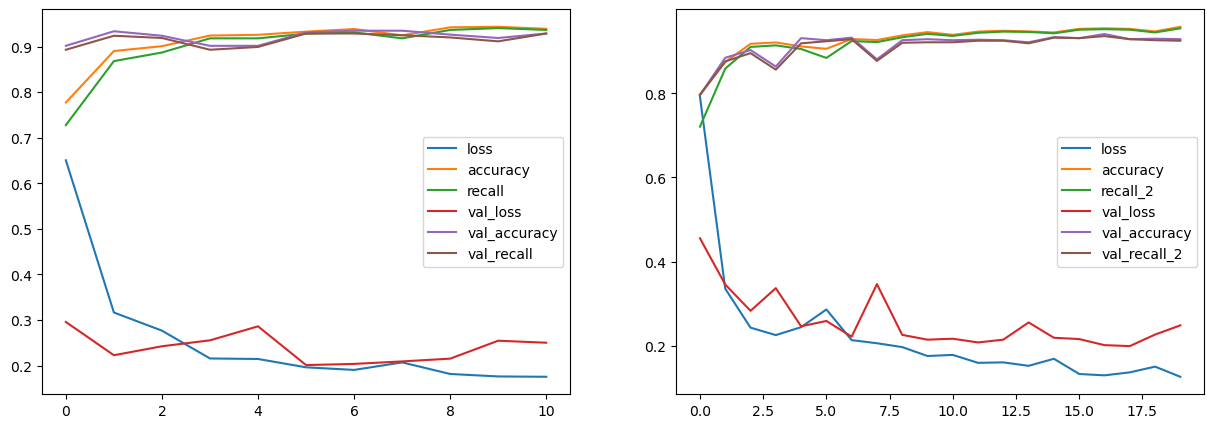

In [264]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
alex1_res.plot(ax=axes[0])
alex2_res.plot(ax=axes[1])

Anschließend erfolgt nun die Darstellung des Trainingsverlaufs der AlexNet-Modelle auf die balancierten Daten.<br>
Vor allem bei `alex3` ist zu sehen, dass das Training zu Beginn sehr ungenau war. Nach etwa 4 Epochen verlief das Training zunächst konstant, wobei hier die Validierungsdaten wesentlich bessere Ergebnisse erzielten als die Trainingsdaten. Anschließend drehte sich dies allerdings wieder um.<br>
Das Senken der Lernrate führte bei `alex4` wiederum zu dem Ergebnis, das bereits zu Beginn besser auf die Daten gelernt werden konnte. Auch hier sind verinzelte Sprünge in den Kurven vorhanden, dennoch zeichnet sich zum Ende des Trainings eine Tendenz zu steigenden Accuracy-Werten bzw. sinkenden Loss-Werten ab.

<AxesSubplot:>

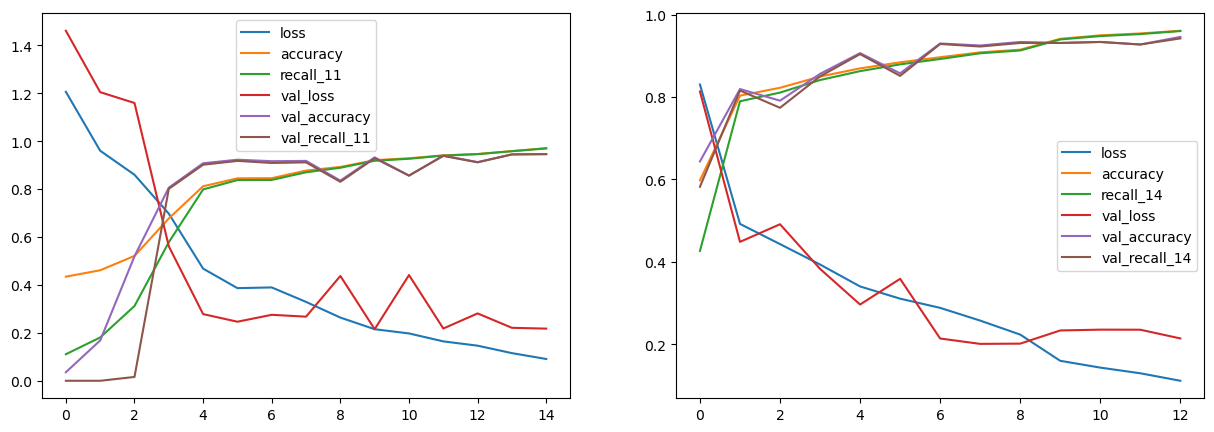

In [265]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
alex3_res.plot(ax=axes[0])
alex4_res.plot(ax=axes[1])

Nun folgt die Darstellung der Ergebnisse der VGG16-Modelle auf die unbalancierten Daten.<br>
Sowohl bei `vgg1` und `vgg2` ist klar zu erkennen, dass das Training praktisch erfolglos war. Es findet keine Verbesserung der Accuracy statt, weshalb davon auszugehen ist, dass die größere Netztiefe und die dadurch mehr vorhandenen Neuronen nicht ausreichend auf die Daten lernen konnten. Erst eine deutliche Reduktion der Lernratebei `vgg3` führte zur einem besseren Ergebnis. Hier konnten sogar sehr gute Werte erzielt werden.

<AxesSubplot:>

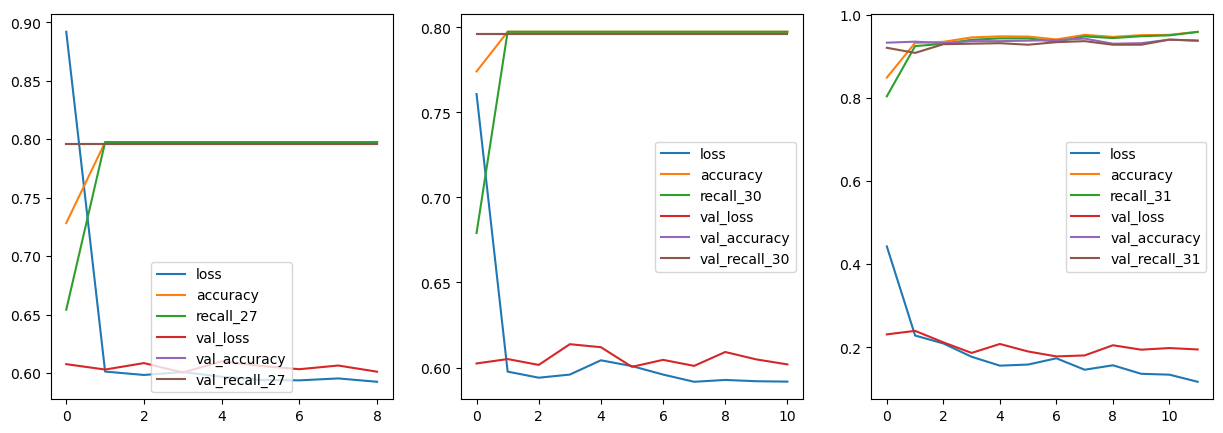

In [267]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
vgg1_res.plot(ax=axes[0])
vgg2_res.plot(ax=axes[1])
vgg3_res.plot(ax=axes[2])

Ähnlich wie schon bei den unbalancierten Daten konnte das Netz sich mit der Standard-Lernrate bei `vgg4` ebenfalls nicht auf die Daten einstellen. DIe Reduktion der Lernrate führte auch hier bei `vgg5` zu einem recht guten Ergebnis, welches jedoch immernoch einen vergleichsweisen hohen Validierungs-Loss-Wert aufweist.

<AxesSubplot:>

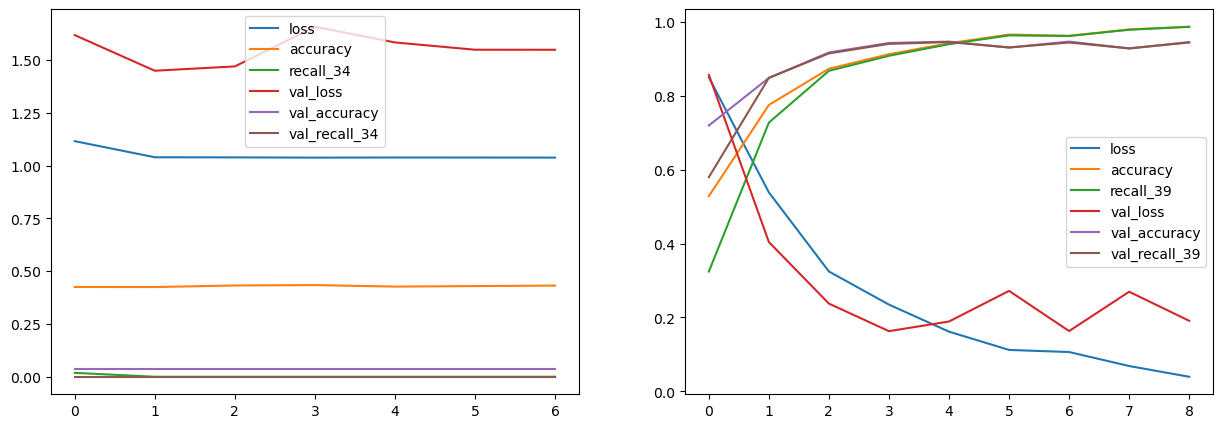

In [268]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
vgg4_res.plot(ax=axes[0])
vgg5_res.plot(ax=axes[1])

Abschließend werden noch die Ergebnisse der Netzevaluationen in DataFrames gesammelt, damit eine bessere Übersicht vorhanden ist und ein Vergleich gezogen werden kann. Dazu werden zunächst die Ergebnisse als Liste zusammengepackt und anschließend in ein DataFrame geladen.

In [303]:
alex_zipped = list(zip(alex1_ev, alex2_ev, alex3_ev, alex4_ev))

In [304]:
df_alex = pd.DataFrame(alex_zipped, columns = ['Unbalanciert - lr = 0.001', 'Unbalanciert - lr = 0.0008', 'Balanciert - lr = 0.001', 'Balanciert - lr = 0.0008'], 
                      index = ['Loss', 'Accuracy', 'Recall'])

Die Evaluationen der AlexNet-Modelle zeigen, dass zum einen mit der Standardlernrate von 0,001 bei den balancierten Daten eine leichte Ergebnisverbesserung erreicht werden konnte. Zudem konnte in beiden Fällen durch das Senken der Lernrate auf 0,0008 ein besseres Ergebnis erreicht werden. Interessant hierbei ist, dass die höchste Accuracy insgesamt zwar bei der reduzierten Lernrate auf die balancierten Daten erzielt wurde, jedoch der geringste Loss-Wert bei den unbalancierten Daten vorliegt.

In [305]:
df_alex

,Unbalanciert - lr = 0.001,Unbalanciert - lr = 0.0008,Balanciert - lr = 0.001,Balanciert - lr = 0.0008
Loss,0.178788,0.112329,0.155016,0.128621
Accuracy,0.944331,0.959476,0.955383,0.962341
Recall,0.943103,0.959476,0.954973,0.961113


Wie bei den AlexNet-Evaluationen erfolgt nun das Verpacken der VGG16-Werte in eine Liste und anschließend die Darstellung als DataFrame.

In [306]:
vgg_zipped = list(zip(vgg1_ev, vgg2_ev, vgg3_ev, vgg4_ev, vgg5_ev))

In [307]:
df_vgg = pd.DataFrame(vgg_zipped, columns = ['Unbalanciert - lr = 0.001', 'Unbalanciert - lr = 0.0008', 'Unbalanciert - lr = 0.0001', 
                                             'Balanciert - lr = 0.001', 'Balanciert - lr = 0.0001'], 
                      index = ['Loss', 'Accuracy', 'Recall'])

Die Ergebnisse zeigen klar, dass sowohl die Lernrate von 0,001 als auch 0,0008 unpassend für das Training mit der VGG16-Architektur sind. Es konnten hierbei nur sehr schlechte Modelle konstruiert werden. Erst bei einer deutlich reduzierten Lernrate von 0,0001 wurden sowohl bei unbalancierten als auch bei balancierten Daten gute Ergebnisse erreicht. Hierbei ist auffällig, dass das Training auf die unbalancierten Daten sogar besser verlief, da hier Accuracy und Loss teilweise deutlich besser sind.

In [308]:
df_vgg

,Unbalanciert - lr = 0.001,Unbalanciert - lr = 0.0008,Unbalanciert - lr = 0.0001,Balanciert - lr = 0.001,Balanciert - lr = 0.0001
Loss,0.588843,0.589486,0.093845,1.550270,0.152212
Accuracy,0.797380,0.797380,0.966435,0.029881,0.949652
Recall,0.797380,0.797380,0.965207,0.000000,0.948424


<a name="Fazit"></a>
## 11. Fazit und Ausblick

Betrachtet man alle Ergebnisse lässt sich festhalten, dass die künstliche Generierung balancierter Daten keinen großen Einfluss darauf hatte, ob ein Modell ausreichende Lernresultate erzielt. Im Gegenteil konnten sogar beim Training auf die unbalancierten Originaldaten bessere Ergebnisse erreicht werden. Zudem konnte bewiesen werden, dass die Netztiefe entscheidenen Einfluss darauf hat, wie die Lernrate zu wählen ist. Ist ein tieferes Netz vorhanden wie im Falle der VGG16-Architektur, muss die Lernrate deutlich niedriger angesetzt werden, um gutes Lernen des Modells zu erreichen.<br>
Zudem ist auffällig, dass je tiefer das Netz ist, desto schlechter schneiden die künstlichen generierten Daten ab. War bei den AlexNet-Modellen zumindest ein recht ähnliches Ergebnis zwischen balancierten und unbalancierten Training vorhanden, weicht dies bei den VGG16-Modellen stark ab. Mögliche Erklärung hierfür ist, dass die künstlich generierten Daten nicht so viele eindeutige und neue Merkmale enthalten wie die Originalen und diese, je tiefer das Netz ist, in diesem "verloren" gehen und damit das Lernergebnis verschlechtern.<br>
Eine weitere Möglichkeit zur Untersuchung besteht darin, einen anderen Algorithmus für das Oversampling zu wählen als den SMOTE-Algorithmus. Generative Adversarial Networks, kurz GAN, bieten sich ebenfalls dafür an, künstliche Daten zu generieren und so ein Gleichgewicht zwischen den Klassen herzustellen. Alternativ könnte auch auf das Undersampling zurückgegriffen werden, allerdings ist hier damit zu rechnen, dass die zusätzliche Reduktion der Daten sich je nach Datensatz eher negativ vor allem bei tiefen Netzwerken wie der VGG16-Architektur auswirkt.<br>
Zur weiteren Untersuchung können auch die Epochenanzahl erhöht sowie der Early-Stopping-Algorithmus entschärft werden, sodass dieser beispielsweise erst nach höheren Anzahl an stagnierenden Epochen eingreift oder ggf. eine andere Metrik zur Bewertung herangezogen wird.

<a name="Literatur"></a>
## 12. Literaturverzeichnis

[1] Larxel, _Face Mask Detection_, Link: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection, 2020<br><br>
[2] Sarthak Gupta, _Face Mask Detector_, Link: https://www.kaggle.com/code/sarthak02gupta/face-mask-detector, 2023<br><br>
[3] Geeks for Geeks, _Plotting multiple bar charts using Matplotlib in Python_, Link: https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/, 2021<br><br>
[4] Analytics Vidhya, _10 Techniques to deal with Imbalanced Classes in Machine Learning_, Link: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/, 2022<br><br>
[5] The imbalanced-learn developers, _SMOTE_, Link: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE, 2023<br><br>
[6] TensorFlow, _TensorFlow API Docs_, Link: https://www.tensorflow.org/api_docs/python/tf, 2023<br><br>
[7] Keras, _Keras API reference_, Link: https://keras.io/api/, 2023<br><br>
[8] Albers Uzila, _5 Popular CNN Architectures Clearly Explained and Visualized_, Link: https://towardsdatascience.com/5-most-well-known-cnn-architectures-visualized-af76f1f0065e#8f20, 2020<br><br>
[9] Marc Mezger, _Computer Vision für Deep Learning – eine kurze Einführung_, Link: 
https://www.adesso.de/de/news/blog/computer-vision-fuer-deep-learning-eine-kurze-einfuehrung.jsp, 2023